In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st
import seaborn as sns

#Pull in data source
spotify = "data.csv"

spotify_data = pd.read_csv(spotify)

#Simplify the dataset to year, artists, and popularity
cleaned_df = spotify_data[["popularity","year","artists","name", "valence", "acousticness", "danceability", "duration_ms",
                           "energy", "instrumentalness", "liveness", "loudness", "speechiness", "tempo"]]
cleaned_df

,popularity,year,artists,name,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,4,1921,"['Sergei Rachmaninoff', 'James Levine', 'Berli...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.0594,0.98200,0.279,831667,0.211,0.878000,0.6650,-20.096,0.0366,80.954
1,5,1921,['Dennis Day'],Clancy Lowered the Boom,0.9630,0.73200,0.819,180533,0.341,0.000000,0.1600,-12.441,0.4150,60.936
2,5,1921,['KHP Kridhamardawa Karaton Ngayogyakarta Hadi...,Gati Bali,0.0394,0.96100,0.328,500062,0.166,0.913000,0.1010,-14.850,0.0339,110.339
3,3,1921,['Frank Parker'],Danny Boy,0.1650,0.96700,0.275,210000,0.309,0.000028,0.3810,-9.316,0.0354,100.109
4,2,1921,['Phil Regan'],When Irish Eyes Are Smiling,0.2530,0.95700,0.418,166693,0.193,0.000002,0.2290,-10.096,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,72,2020,"['Anuel AA', 'Daddy Yankee', 'KAROL G', 'Ozuna...",China,0.6080,0.08460,0.786,301714,0.808,0.000289,0.0822,-3.702,0.0881,105.029
170649,68,2020,['Ashnikko'],Halloweenie III: Seven Days,0.7340,0.20600,0.717,150654,0.753,0.000000,0.1010,-6.020,0.0605,137.936
170650,76,2020,['MAMAMOO'],AYA,0.6370,0.10100,0.634,211280,0.858,0.000009,0.2580,-2.226,0.0809,91.688
170651,70,2020,['Eminem'],Darkness,0.1950,0.00998,0.671,337147,0.623,0.000008,0.6430,-7.161,0.3080,75.055


In [2]:
#Clean artists column by deleting brackets and quotations
cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\[","")
cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\]","")
cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\"","")
cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\'","")

cleaned_df

C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12012\4187958532.py:2: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\[","")
C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12012\4187958532.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\[","")
C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12012\4187958532.py:3: FutureWarning: The default value of regex will change from True to False in a future version.
  cleaned_df['artists'] = cleaned_df['artists'].str.replace(r"\]","")
C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12012\4187958532.py:3: SettingWithCopyWarning: 
A

,popularity,year,artists,name,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo
0,4,1921,"Sergei Rachmaninoff, James Levine, Berliner Ph...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.0594,0.98200,0.279,831667,0.211,0.878000,0.6650,-20.096,0.0366,80.954
1,5,1921,Dennis Day,Clancy Lowered the Boom,0.9630,0.73200,0.819,180533,0.341,0.000000,0.1600,-12.441,0.4150,60.936
2,5,1921,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,Gati Bali,0.0394,0.96100,0.328,500062,0.166,0.913000,0.1010,-14.850,0.0339,110.339
3,3,1921,Frank Parker,Danny Boy,0.1650,0.96700,0.275,210000,0.309,0.000028,0.3810,-9.316,0.0354,100.109
4,2,1921,Phil Regan,When Irish Eyes Are Smiling,0.2530,0.95700,0.418,166693,0.193,0.000002,0.2290,-10.096,0.0380,101.665
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,72,2020,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",China,0.6080,0.08460,0.786,301714,0.808,0.000289,0.0822,-3.702,0.0881,105.029
170649,68,2020,Ashnikko,Halloweenie III: Seven Days,0.7340,0.20600,0.717,150654,0.753,0.000000,0.1010,-6.020,0.0605,137.936
170650,76,2020,MAMAMOO,AYA,0.6370,0.10100,0.634,211280,0.858,0.000009,0.2580,-2.226,0.0809,91.688
170651,70,2020,Eminem,Darkness,0.1950,0.00998,0.671,337147,0.623,0.000008,0.6430,-7.161,0.3080,75.055


In [3]:
# Establish the bins.
decade_bins = [1921, 1929, 1939, 1949, 1959, 1969, 1979, 1989, 1999, 2009, 2019, 2020]
labels = ["20s", "30s", "40s", "50s", "60s", "70s", "80s", "90s", "2000s", "2010s", "2020s"]

# Use "pd.cut" to categorize popularity based on the bins.
cleaned_df["Decade"] = pd.cut(cleaned_df["year"], decade_bins, labels=labels, include_lowest=True)

#rename name to song title
#cleaned_df = cleaned_df.rename(columns={'name': 'song title'})

cleaned_df.head()

C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12012\992552784.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df["Decade"] = pd.cut(cleaned_df["year"], decade_bins, labels=labels, include_lowest=True)


,popularity,year,artists,name,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,Decade
0,4,1921,"Sergei Rachmaninoff, James Levine, Berliner Ph...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.0594,0.982,0.279,831667,0.211,0.878000,0.665,-20.096,0.0366,80.954,20s
1,5,1921,Dennis Day,Clancy Lowered the Boom,0.9630,0.732,0.819,180533,0.341,0.000000,0.160,-12.441,0.4150,60.936,20s
2,5,1921,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,Gati Bali,0.0394,0.961,0.328,500062,0.166,0.913000,0.101,-14.850,0.0339,110.339,20s
3,3,1921,Frank Parker,Danny Boy,0.1650,0.967,0.275,210000,0.309,0.000028,0.381,-9.316,0.0354,100.109,20s
4,2,1921,Phil Regan,When Irish Eyes Are Smiling,0.2530,0.957,0.418,166693,0.193,0.000002,0.229,-10.096,0.0380,101.665,20s


In [4]:
#Rank the songs by Popularity in each decade
cleaned_df['Rank'] = cleaned_df.groupby(['Decade'])['popularity'].rank(ascending=False, method='first')
cleaned_df

C:\Users\seagun.lee\AppData\Local\Temp\ipykernel_12012\1823335098.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  cleaned_df['Rank'] = cleaned_df.groupby(['Decade'])['popularity'].rank(ascending=False, method='first')


,popularity,year,artists,name,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,Decade,Rank
0,4,1921,"Sergei Rachmaninoff, James Levine, Berliner Ph...","Piano Concerto No. 3 in D Minor, Op. 30: III. ...",0.0594,0.98200,0.279,831667,0.211,0.878000,0.6650,-20.096,0.0366,80.954,20s,459.0
1,5,1921,Dennis Day,Clancy Lowered the Boom,0.9630,0.73200,0.819,180533,0.341,0.000000,0.1600,-12.441,0.4150,60.936,20s,399.0
2,5,1921,KHP Kridhamardawa Karaton Ngayogyakarta Hadini...,Gati Bali,0.0394,0.96100,0.328,500062,0.166,0.913000,0.1010,-14.850,0.0339,110.339,20s,400.0
3,3,1921,Frank Parker,Danny Boy,0.1650,0.96700,0.275,210000,0.309,0.000028,0.3810,-9.316,0.0354,100.109,20s,522.0
4,2,1921,Phil Regan,When Irish Eyes Are Smiling,0.2530,0.95700,0.418,166693,0.193,0.000002,0.2290,-10.096,0.0380,101.665,20s,601.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,72,2020,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",China,0.6080,0.08460,0.786,301714,0.808,0.000289,0.0822,-3.702,0.0881,105.029,2020s,895.0
170649,68,2020,Ashnikko,Halloweenie III: Seven Days,0.7340,0.20600,0.717,150654,0.753,0.000000,0.1010,-6.020,0.0605,137.936,2020s,1305.0
170650,76,2020,MAMAMOO,AYA,0.6370,0.10100,0.634,211280,0.858,0.000009,0.2580,-2.226,0.0809,91.688,2020s,546.0
170651,70,2020,Eminem,Darkness,0.1950,0.00998,0.671,337147,0.623,0.000008,0.6430,-7.161,0.3080,75.055,2020s,1107.0


# Decade Average as a Whole Compared to Charactertic of Popular Songs

In [5]:
cleaned_df = cleaned_df.rename(columns={'name':'Song Title'})

In [6]:
decade_average = cleaned_df.groupby('Decade').mean()
decade_average

,popularity,year,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,Rank
Decade,,,,,,,,,,,,,
20s,1.304331,1926.712837,0.542143,0.801554,0.586963,183769.229419,0.235133,0.377181,0.210910,-16.699090,0.291475,110.431253,2563.5
30s,2.536601,1934.089224,0.567896,0.867694,0.541664,207616.599539,0.286655,0.276707,0.225639,-14.214586,0.204065,111.545690,4775.0
40s,1.876252,1944.848225,0.487830,0.870974,0.473476,217894.653661,0.254896,0.363176,0.221343,-15.331419,0.153847,107.379639,7689.5
50s,10.692091,1954.486146,0.478597,0.840334,0.476858,220482.874358,0.286753,0.247795,0.209219,-14.731226,0.093679,110.972049,9925.5
60s,26.551742,1964.565093,0.551939,0.624013,0.494697,211668.431071,0.414520,0.157578,0.208687,-12.676736,0.057731,115.166468,9775.0
70s,35.055800,1974.500000,0.585098,0.400162,0.524927,254051.705500,0.533716,0.116031,0.216406,-11.424966,0.059764,119.858574,10000.5
80s,37.523426,1984.496222,0.564420,0.298634,0.546385,252120.366045,0.594715,0.122269,0.204639,-11.226990,0.062035,121.345255,9925.5
90s,44.192252,1994.497714,0.544997,0.307533,0.566082,248595.562535,0.586066,0.109744,0.196547,-10.004415,0.080528,119.404234,9951.0
2000s,49.734348,2004.484933,0.530295,0.269761,0.574142,239517.406953,0.651586,0.083848,0.195582,-7.501916,0.087719,121.254695,9823.5


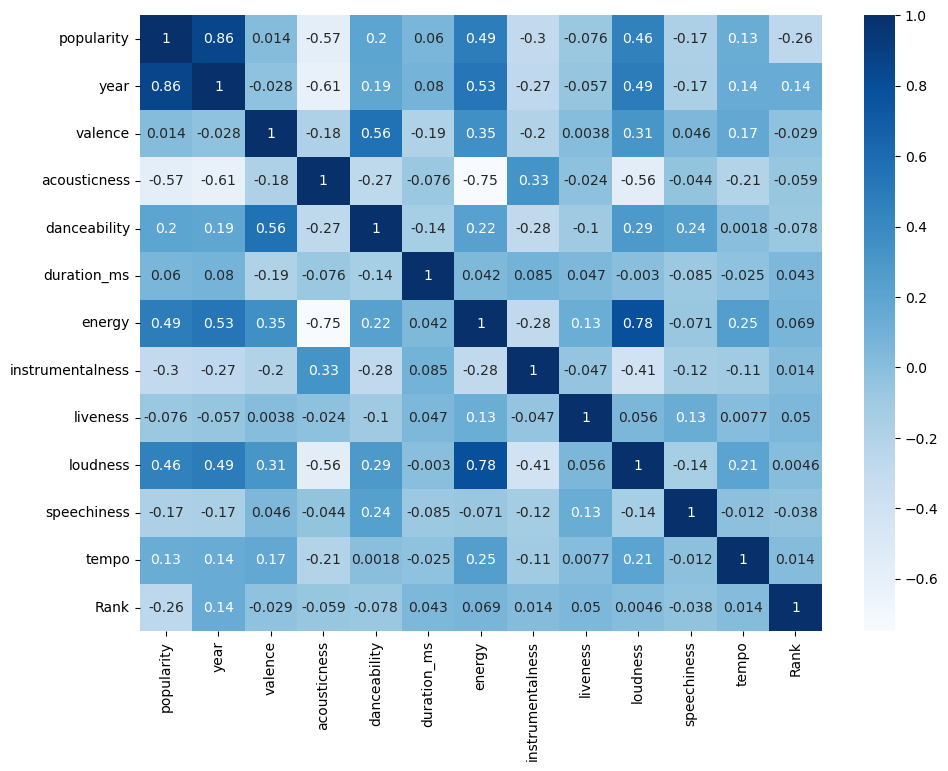

In [7]:
corr = cleaned_df.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Blues",annot=True)
plt.show()

In [8]:
#Sort out songs for highest popularity of each decade
top_artist = cleaned_df.loc[cleaned_df['Rank'] < 4]

top_artist_avg = top_artist.groupby('Decade').mean()
top_artist_avg

,popularity,year,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,Rank
Decade,,,,,,,,,,,,,
20s,50.666667,1927.666667,0.440667,0.751333,0.604667,319791.000000,0.447667,0.297977,0.222333,-13.416000,0.064467,100.149333,2.0
30s,59.666667,1934.000000,0.385000,0.907000,0.432000,223725.000000,0.215800,0.003521,0.193333,-11.671667,0.045300,92.302667,2.0
40s,72.333333,1943.666667,0.310000,0.804333,0.315333,168604.333333,0.184667,0.119193,0.244667,-15.441000,0.042333,136.110000,2.0
50s,76.666667,1958.333333,0.750000,0.851000,0.483333,135960.000000,0.437667,0.000368,0.209000,-13.268000,0.050633,132.170000,2.0
60s,83.333333,1965.333333,0.689333,0.471300,0.462000,154644.333333,0.536667,0.000827,0.267000,-9.222667,0.040600,132.665333,2.0
70s,85.333333,1977.333333,0.607000,0.043713,0.660333,285858.666667,0.637667,0.002118,0.113833,-8.007000,0.062533,127.668000,2.0
80s,84.000000,1982.666667,0.793000,0.190667,0.567667,244897.666667,0.684667,0.004613,0.082333,-7.704000,0.045267,130.066333,2.0
90s,84.666667,1992.000000,0.471667,0.269049,0.530667,221653.333333,0.647000,0.003900,0.117667,-7.033667,0.037033,134.499333,2.0
2000s,84.000000,2000.666667,0.261667,0.024723,0.511000,260480.000000,0.790667,0.000040,0.174867,-5.444667,0.090833,149.987333,2.0


In [9]:
top_artist.to_csv('Top 3 songs for each decade.csv', index=False)

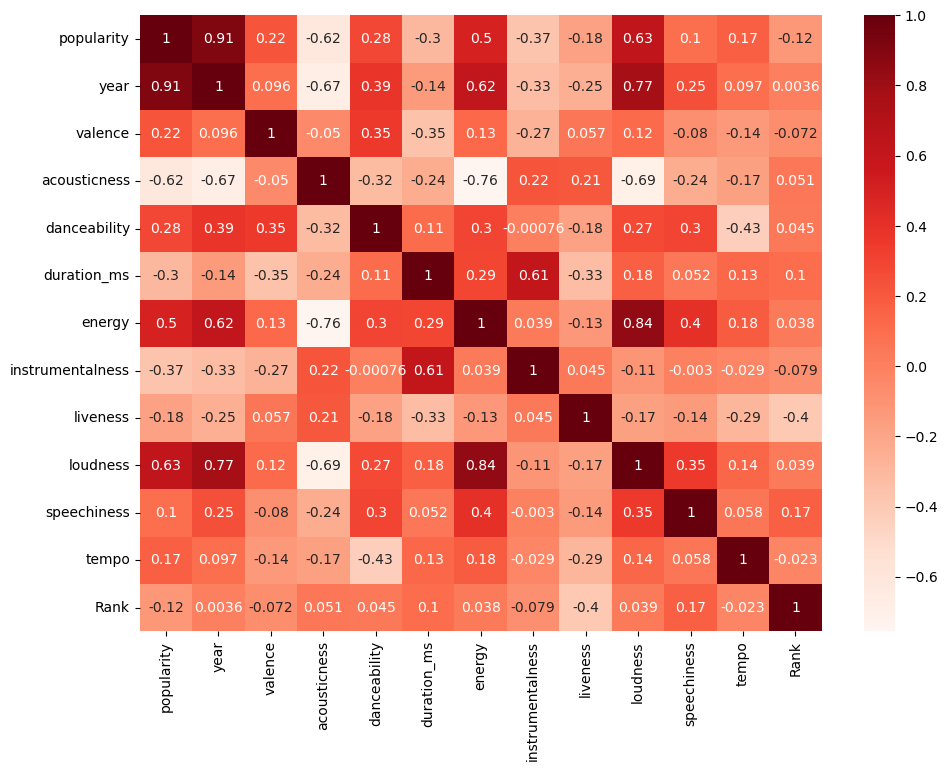

In [10]:
corr = top_artist.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Reds",annot=True)
plt.show()

In [126]:
#Top 100 songs regardless of the decade
top_alltime = cleaned_df.loc[cleaned_df['popularity'] > 87]
top_alltime_sort = top_alltime.sort_values(by='popularity', ascending=False)

top_alltime_sort

,popularity,year,artists,Song Title,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,Decade,Rank
19611,100,2020,"Bad Bunny, Jhay Cortez",Dakiti,0.145,0.40100,0.731,205090,0.573,0.000052,0.1130,-10.059,0.0544,109.928,2020s,1.0
19606,99,2020,"24kGoldn, iann dior",Mood (feat. iann dior),0.756,0.22100,0.700,140526,0.722,0.000000,0.2720,-3.558,0.0369,90.989,2020s,2.0
19618,97,2020,BTS,Dynamite,0.737,0.01120,0.746,199054,0.765,0.000000,0.0936,-4.410,0.0993,114.044,2020s,3.0
19608,96,2020,"Cardi B, Megan Thee Stallion",WAP (feat. Megan Thee Stallion),0.357,0.01940,0.935,187541,0.454,0.000000,0.0824,-7.509,0.3750,133.073,2020s,4.0
19616,96,2020,The Weeknd,Blinding Lights,0.334,0.00146,0.514,200040,0.730,0.000095,0.0897,-5.934,0.0598,171.005,2020s,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
19692,88,2020,salem ilese,Mad at Disney,0.715,0.42400,0.738,136839,0.621,0.000007,0.6920,-7.313,0.0486,113.968,2020s,58.0
14406,88,1994,Mariah Carey,All I Want for Christmas Is You,0.350,0.16400,0.336,241107,0.627,0.000000,0.0708,-7.463,0.0384,150.273,90s,1.0
19635,88,2020,"Machine Gun Kelly, blackbear",my ex's best friend (with blackbear),0.298,0.00473,0.731,139461,0.675,0.000000,0.1410,-5.134,0.0434,124.939,2020s,56.0
19637,88,2020,"Ariana Grande, Doja Cat",motive (with Doja Cat),0.661,0.06810,0.789,167990,0.742,0.000000,0.1660,-5.664,0.0652,116.965,2020s,57.0


In [127]:
top_alltime_sort.to_csv('Top songs all time.csv', index=False)

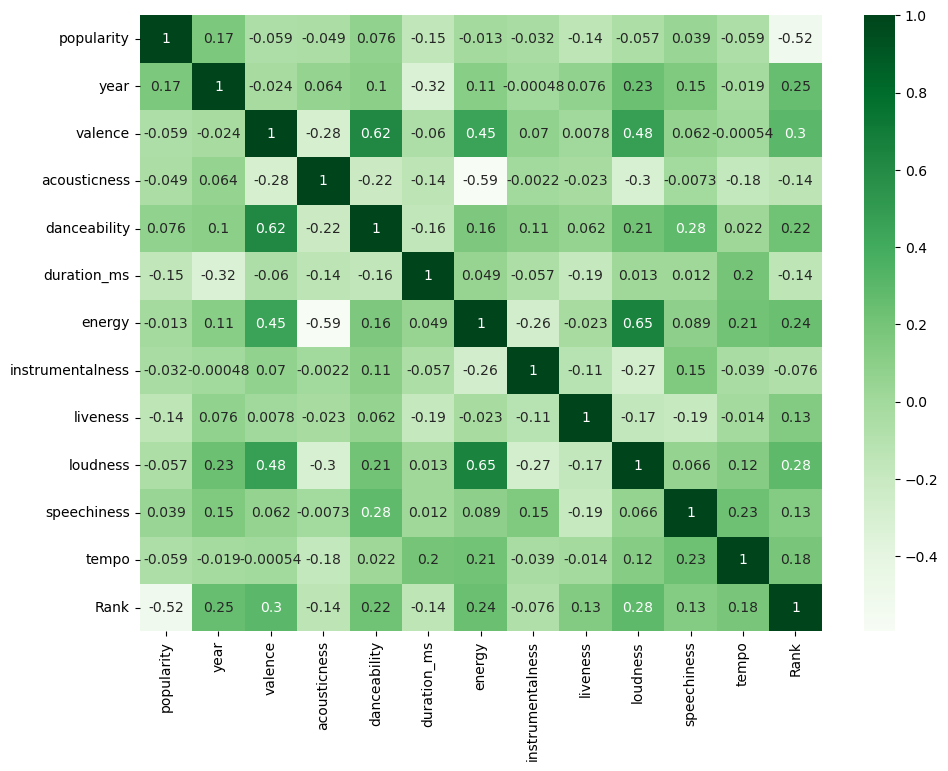

In [128]:
corr = top_alltime_sort.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="Greens",annot=True)
plt.show()

# Below Here is Counts in the Rankings of Each Decade and Checks How Popular Songs of Each Era are Related to Characteristics of Popular Songs

In [14]:
cleaned_df.loc[cleaned_df["Decade"] == "30s"].sort_values(by='Rank')

,popularity,year,artists,Song Title,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,speechiness,tempo,Decade,Rank
2206,64,1933,"Billie Holiday, Eddie Heywood",All of Me (with Eddie Heywood & His Orchestra),0.403,0.972,0.504,181440,0.0644,0.000004,0.174,-14.754,0.0408,106.994,30s,1.0
3406,60,1939,Harry James,"It's Been a Long, Long Time",0.375,0.938,0.271,203773,0.2190,0.000860,0.263,-9.767,0.0310,74.680,30s,2.0
1606,55,1930,Joe Quartz,Monster Faladoré,0.377,0.811,0.521,285962,0.3640,0.009700,0.143,-10.494,0.0641,95.234,30s,3.0
3006,54,1937,Robert Johnson,Cross Road Blues,0.638,0.930,0.675,149560,0.3110,0.000261,0.102,-11.959,0.0525,97.159,30s,4.0
3407,54,1939,Glenn Miller,Moonlight Serenade,0.147,0.862,0.342,202760,0.1260,0.099800,0.146,-11.857,0.0265,77.873,30s,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
155748,0,1930,B. Chagy,Minkomcho,0.163,0.992,0.281,177987,0.1730,0.047500,0.113,-15.958,0.0377,83.204,30s,9545.0
155749,0,1930,"Markos Vamvakaris, Apostolos Xatzixristos",Ta dio sou xeria,0.870,0.993,0.564,187787,0.3900,0.883000,0.114,-13.142,0.0349,105.900,30s,9546.0
155750,0,1930,"Igor Stravinsky, Ernest Ansermet, Orchestre De...",Capriccio for Piano and Orchestra: II. Andante...,0.270,0.985,0.243,303177,0.0989,0.908000,0.115,-27.467,0.0318,82.334,30s,9547.0
155751,0,1930,"Igor Stravinsky, Ernest Ansermet, Orchestre De...",Capriccio for Piano and Orchestra:: III. Alleg...,0.463,0.986,0.456,339409,0.1970,0.683000,0.282,-19.601,0.0392,92.920,30s,9548.0


In [15]:
#Organize the data
cleaned_final = cleaned_df[["Decade", "popularity", "Rank", "Song Title","artists", "valence", "acousticness", "danceability", "duration_ms",
                           "energy", "instrumentalness", "liveness", "loudness", "tempo"]]

In [16]:
#Clean the data to Top 10 songs for each decade by Popularity
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '20s') & (cleaned_final['Rank'] < 514)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '30s') & (cleaned_final['Rank'] < 956)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '40s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '50s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '60s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '70s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '80s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '90s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '2000s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '2010s') & (cleaned_final['Rank'] < 1001)]
#ranked_df = cleaned_final[(cleaned_final['Decade'] == '2020s') & (cleaned_final['Rank'] < 204)]

ranked_df = cleaned_final.loc[cleaned_final['popularity'] > 29]
ranked_df

,Decade,popularity,Rank,Song Title,artists,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,tempo
221,20s,42,6.0,Weather Bird,"Louis Armstrong, Earl Hines",0.901,0.98400,0.831,161933,0.2620,0.912000,0.2040,-12.386,104.606
222,20s,42,7.0,Nobody Knows You When You're Down and Out,Bessie Smith,0.211,0.99600,0.614,177133,0.0423,0.002930,0.1830,-12.033,89.822
224,20s,32,15.0,Ain't Misbehavin',Louis Armstrong,0.503,0.97600,0.665,192600,0.2540,0.002170,0.6440,-9.879,125.734
606,20s,37,11.0,"On the Sunny Side of the Street (From ""Is Ever...",Tommy Dorsey,0.580,0.96900,0.678,194320,0.1750,0.001050,0.1770,-13.021,112.941
607,20s,30,17.0,Manhattan Serenade,Tommy Dorsey,0.406,0.98000,0.455,275773,0.0804,0.000317,0.1360,-15.696,77.926
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
170648,2020s,72,895.0,China,"Anuel AA, Daddy Yankee, KAROL G, Ozuna, J Balvin",0.608,0.08460,0.786,301714,0.8080,0.000289,0.0822,-3.702,105.029
170649,2020s,68,1305.0,Halloweenie III: Seven Days,Ashnikko,0.734,0.20600,0.717,150654,0.7530,0.000000,0.1010,-6.020,137.936
170650,2020s,76,546.0,AYA,MAMAMOO,0.637,0.10100,0.634,211280,0.8580,0.000009,0.2580,-2.226,91.688
170651,2020s,70,1107.0,Darkness,Eminem,0.195,0.00998,0.671,337147,0.6230,0.000008,0.6430,-7.161,75.055


In [17]:
#Calculate average of each characteristcs by decade
average_ranked = ranked_df.groupby('Decade').mean()
average_ranked

,popularity,Rank,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,tempo
Decade,,,,,,,,,,,
20s,38.800000,10.5,0.589750,0.927800,0.620600,209330.600000,0.251100,0.257203,0.179045,-13.262750,119.395200
30s,37.900000,50.5,0.541727,0.921130,0.574060,177188.040000,0.243082,0.150551,0.215317,-13.615220,111.249530
40s,41.879699,67.0,0.512714,0.842483,0.489195,180685.090226,0.250806,0.124115,0.205070,-14.510534,116.003323
50s,39.742202,786.0,0.505309,0.787023,0.503471,214747.425843,0.307423,0.124288,0.179206,-13.488610,112.610402
60s,40.881863,3179.0,0.565944,0.568540,0.502674,207723.477269,0.439379,0.128262,0.196249,-12.051133,116.088447
70s,41.117863,6270.5,0.585551,0.389511,0.530158,255687.075199,0.532986,0.110078,0.202526,-11.290130,119.750098
80s,41.473104,7436.5,0.566110,0.300662,0.548589,254624.115519,0.594664,0.118859,0.198281,-11.149106,121.289916
90s,44.537743,9744.0,0.544972,0.306826,0.566409,248316.442449,0.586625,0.109302,0.196363,-9.969409,119.387515
2000s,49.849439,9800.5,0.530110,0.269516,0.574213,239524.183673,0.651738,0.083631,0.195601,-7.498461,121.258856


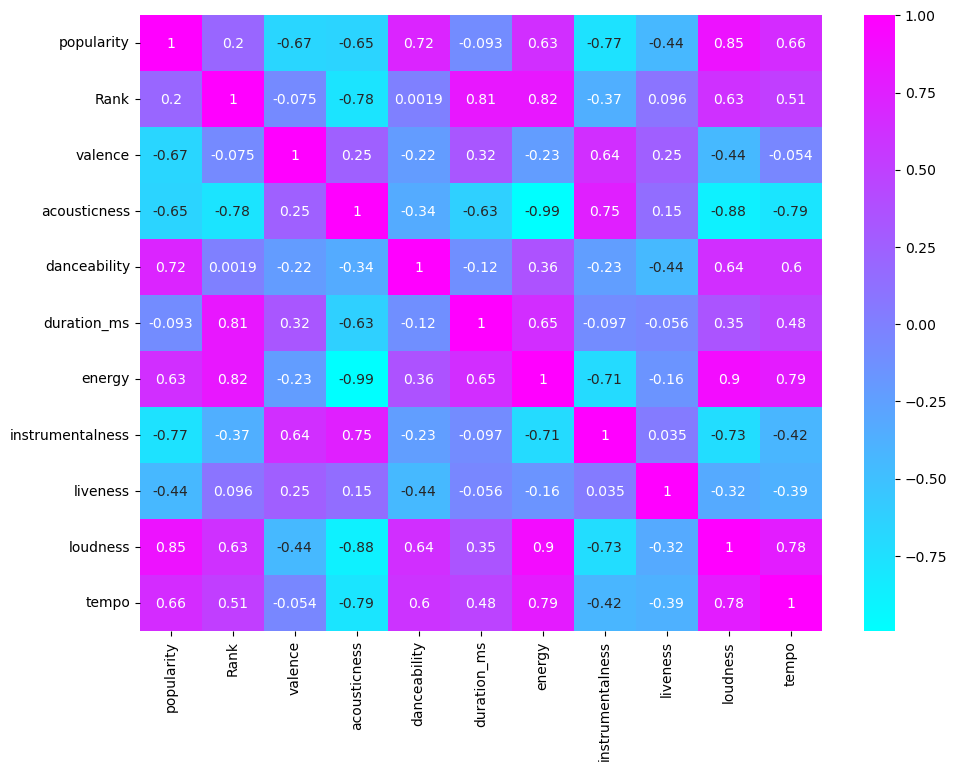

In [26]:
corr = average_ranked.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="cool",annot=True)
plt.show()

In [30]:
ranked_df['Decade'].value_counts()

2000s    19600
90s      19487
2010s    19100
80s      14872
70s      12540
60s       6357
2020s     1830
50s       1571
40s        133
30s        100
20s         20
Name: Decade, dtype: int64

In [234]:
ranked_df.to_csv('Top 10 songs for each decade.csv', index=False)

In [235]:
cleaned_df.to_csv('Top 10 songs for each decade11.csv', index=False)

In [72]:
#Pick 10 % of each decade.  Per sample rule, anything over 1000 sample is set at 1000 samples.
#cleaned_final['Decade'].value_counts()

twentys = cleaned_final.loc[cleaned_final['Decade'] == '20s']
twentys_10pct = Twentys.loc[cleaned_final['Rank'] < 514]

thirtys = cleaned_final.loc[cleaned_final['Decade'] == '30s']
thirtys_10pct = thirtys.loc[cleaned_final['Rank'] < 955]

fourties = cleaned_final.loc[cleaned_final['Decade'] == '40s']
fourties_10pct = fourties.loc[cleaned_final['Rank'] < 1000]

fifties = cleaned_final.loc[cleaned_final['Decade'] == '50s']
fifties_10pct = fifties.loc[cleaned_final['Rank'] < 1000]

sixties = cleaned_final.loc[cleaned_final['Decade'] == '60s']
sixties_10pct = sixties.loc[cleaned_final['Rank'] < 1000]

seventies = cleaned_final.loc[cleaned_final['Decade'] == '70s']
seventies_10pct = seventies.loc[cleaned_final['Rank'] < 1000]

eighties = cleaned_final.loc[cleaned_final['Decade'] == '80s']
eighties_10pct = eighties.loc[cleaned_final['Rank'] < 1000]

nineties = cleaned_final.loc[cleaned_final['Decade'] == '90s']
nineties_10pct = nineties.loc[cleaned_final['Rank'] < 1000]

two_thousand = cleaned_final.loc[cleaned_final['Decade'] == '2000s']
two_thousand_10pct = two_thousand.loc[cleaned_final['Rank'] < 1000]

two_ten = cleaned_final.loc[cleaned_final['Decade'] == '2010s']
two_ten_10pct = two_ten.loc[cleaned_final['Rank'] < 1000]

two_twenty = cleaned_final.loc[cleaned_final['Decade'] == '2020s']
two_twenty_10pct = two_twenty.loc[cleaned_final['Rank'] < 203]

In [73]:
all_10pct = pd.concat([twentys_10pct, thirtys_10pct, fourties_10pct,fifties_10pct,sixties_10pct,seventies_10pct
                 ,eighties_10pct,nineties_10pct,two_thousand_10pct,two_ten_10pct,two_twenty_10pct], axis=0, join='inner')

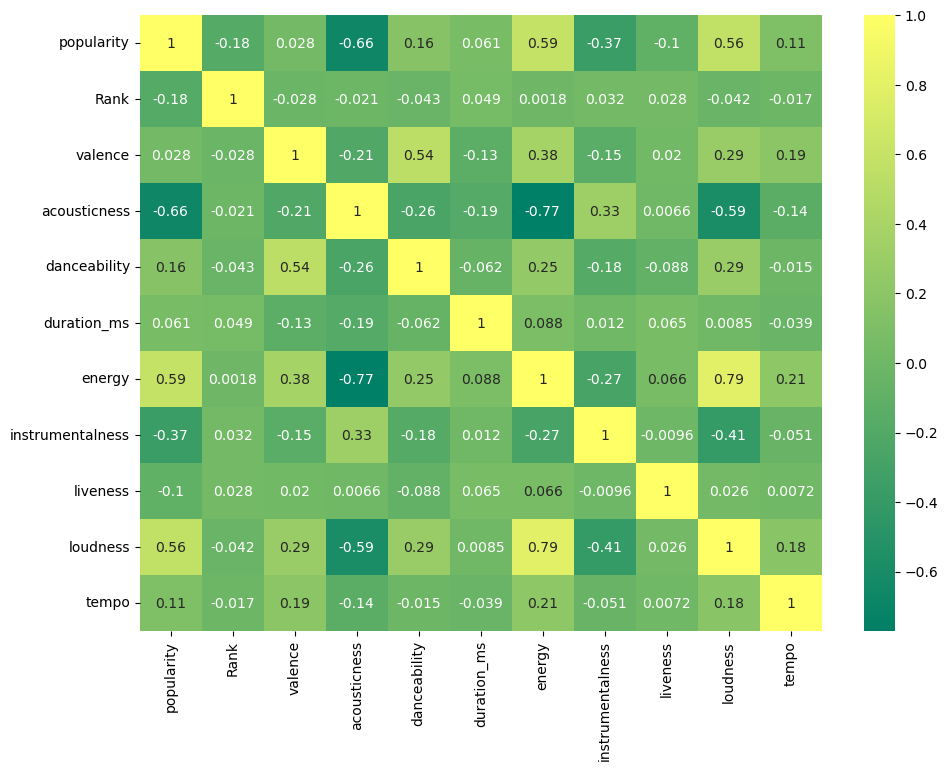

In [74]:
corr = all_10pct.corr()

plt.figure(figsize=(11,8))
sns.heatmap(corr, cmap="summer",annot=True)
plt.show()

In [71]:
all_10pct = all_10pct.groupby('Decade').mean()
all_10pct

,popularity,Rank,valence,acousticness,danceability,duration_ms,energy,instrumentalness,liveness,loudness,tempo
Decade,,,,,,,,,,,
20s,10.832359,257.0,0.610321,0.942273,0.613786,201694.886940,0.247998,0.390171,0.199408,-13.800004,116.181287
30s,18.471698,477.5,0.573060,0.795073,0.591096,220935.093291,0.279328,0.195120,0.220743,-14.431007,112.348059
40s,19.717718,500.0,0.450447,0.852968,0.481060,211145.615616,0.240881,0.229956,0.217803,-15.724086,111.197799
50s,44.323323,500.0,0.508054,0.785319,0.504157,212993.670671,0.310225,0.117121,0.172671,-13.388977,112.581746
60s,59.022022,500.0,0.598202,0.506578,0.516112,196015.778779,0.465321,0.072802,0.189373,-11.243734,118.362207
70s,64.440440,500.0,0.619520,0.347516,0.563556,251234.639640,0.561692,0.054256,0.172654,-10.494592,120.389149
80s,64.836837,500.0,0.610690,0.238569,0.598507,256312.708709,0.641235,0.047396,0.174758,-9.698693,121.847935
90s,67.527528,500.0,0.570032,0.218404,0.603464,252412.646647,0.646471,0.042843,0.179609,-8.198291,118.407518
2000s,70.604605,500.0,0.555483,0.197853,0.611072,238602.507508,0.703790,0.025376,0.191595,-6.079673,122.063932
